## Create test and training folders for initial CNN

In [1]:
import numpy as np
import pandas as pd

import os
import glob
from shutil import copyfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

__Helper Functions for Images__

In [2]:
def random_mask(image_name, mask_path, mask_perc):
    im_watch = Image.open(image_name)
    #im_watch = im_watch.resize((299,299))
    im_watch_array = np.array(im_watch)
    
    check_mask = np.random.uniform(0,1)
    if check_mask < mask_perc:
        
        mask_files = os.listdir(mask_path)
        im_mask = Image.open(mask_path + np.random.choice(mask_files))
        im_mask = im_mask.resize((im_watch.size))
        im_mask_array = np.array(im_mask)

        is_white = (im_watch_array[:,:,0]>252) & \
            (im_watch_array[:,:,1]>250) & \
            (im_watch_array[:,:,1]>250) 
        is_white = np.dstack((is_white,is_white,is_white))
        im_watch_array[is_white == 1] = im_mask_array[is_white == 1]
    
    return im_watch_array

In [3]:
mask_path = 'all_masks/'
mask_files = os.listdir(mask_path)

In [4]:
test_image = 'all_pics/RolexExplorer39mm214270Black.jpg'

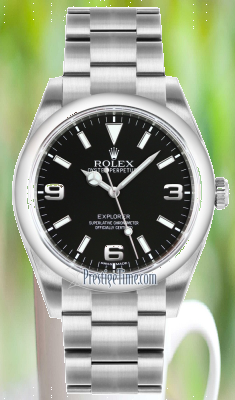

In [5]:
watch_img_array = random_mask(image_name=test_image, mask_path=mask_path, mask_perc=.7)
watch_img = Image.fromarray(watch_img_array)
watch_img

__Open Data__

In [6]:
#watch_df = pd.read_csv('all_watch_info.csv')
#watch_df = pd.read_csv('all_watch_info.csv')
watch_df = pd.read_csv('all_watch_info_with_indicators.csv')

In [7]:
#watch_df.groupby('image_url').count().sort_values('brand',ascending = False)

Lets start something that *seems* simple ... whether the watch is on a braclet or strap

In [8]:
X = watch_df[['new_image_name','image_name','gender']]
y = watch_df['is_gold']
#y = watch_df['shape_simple']

In [9]:
sum(watch_df.is_gold)/len(watch_df)

0.30455020423672463

In [10]:
#y = watch_df['is_male']

Uncomment this code 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Build Directories

In [12]:
# feature = 'band_data'
# positive = 'strap'
# null = 'bracelet'

feature = 'binary_gold_masked/'
positive = 'gold'
null = 'not_gold'

In [13]:
def copy_train_test(feature,positive,null):

    # Build folders
    try:
        os.stat(feature)
    except:
        os.mkdir(feature) 

    # Train Data Paths
    try:
        os.stat(feature + '/train/')
    except:
        os.mkdir(feature + '/train/')   

    try:
        os.stat(feature + '/train/'+positive)
    except:
        os.mkdir(feature + '/train/'+positive)     


    try:
        os.stat(feature + '/train/'+null)
    except:
        os.mkdir(feature + '/train/'+null)      


    # Test Data Paths  
    try:
        os.stat(feature + '/test/')
    except:
        os.mkdir(feature + '/test/')   

    try:
        os.stat(feature + '/test/'+positive)
    except:
        os.mkdir(feature + '/test/'+positive)     


    try:
        os.stat(feature + '/test/'+null)
    except:
        os.mkdir(feature + '/test/'+null)      



    # Make Copies for Train Data
    for ix, val in enumerate(y_train):

        if X_train.iloc[ix,:]['gender'] == 'mens':
            f_path = 'prestige_time_pics_mens/'
        else:
            f_path = 'prestige_time_pics_womens/'

        f_name_old = X_train.iloc[ix,:]['image_name'] + '.jpg'
        f_name_new = X_train.iloc[ix,:]['new_image_name'] + '.jpg'

        if val == 1:
            f_out = feature+'/train/'+positive+'/'+f_name_new
        else:
            f_out = feature+'/train/'+null+'/'+f_name_new

        watch_img_array = random_mask(image_name=f_path+f_name_old,
                                      mask_path=mask_path, mask_perc=.7)
        watch_img = Image.fromarray(watch_img_array)
        watch_img.save(f_out)

    # Make copies for test data    
    for ix, val in enumerate(y_test):

        if X_test.iloc[ix,:]['gender'] == 'mens':
            f_path = 'prestige_time_pics_mens/'
        else:
            f_path = 'prestige_time_pics_womens/'

        f_name_old = X_test.iloc[ix,:]['image_name'] + '.jpg'
        f_name_new = X_test.iloc[ix,:]['new_image_name'] + '.jpg'

        if val == 1:
            f_out = feature+'/test/'+positive+'/'+f_name_new
        else:
            f_out = feature+'/test/'+null+'/'+f_name_new

        watch_img_array = random_mask(image_name=f_path+f_name_old,
                                      mask_path=mask_path, mask_perc=.7)
        watch_img = Image.fromarray(watch_img_array)
        watch_img.save(f_out)

In [14]:
copy_train_test(feature,positive,null)

In [19]:
good_files = []
for filename in glob.iglob('binary_gold_masked/**/**/*.jpg', recursive=True):
    good_files.append(filename)

In [20]:
len(list(set(good_files)))

10527